#Slope Charts
- Consider using a slope chart or Bland-Altman plot when comparing one variable at two different time points, especially for a small number of observations.
- Slope charts use angle to encode change. Use geom_line() to create slope charts. It is useful when comparing a small number of observations.
- The Bland-Altman plot (Tukey mean difference plot, MA plot) graphs the difference between conditions on the y-axis and the mean between conditions on the x-axis. It is more appropriate for large numbers of observations than slope charts.

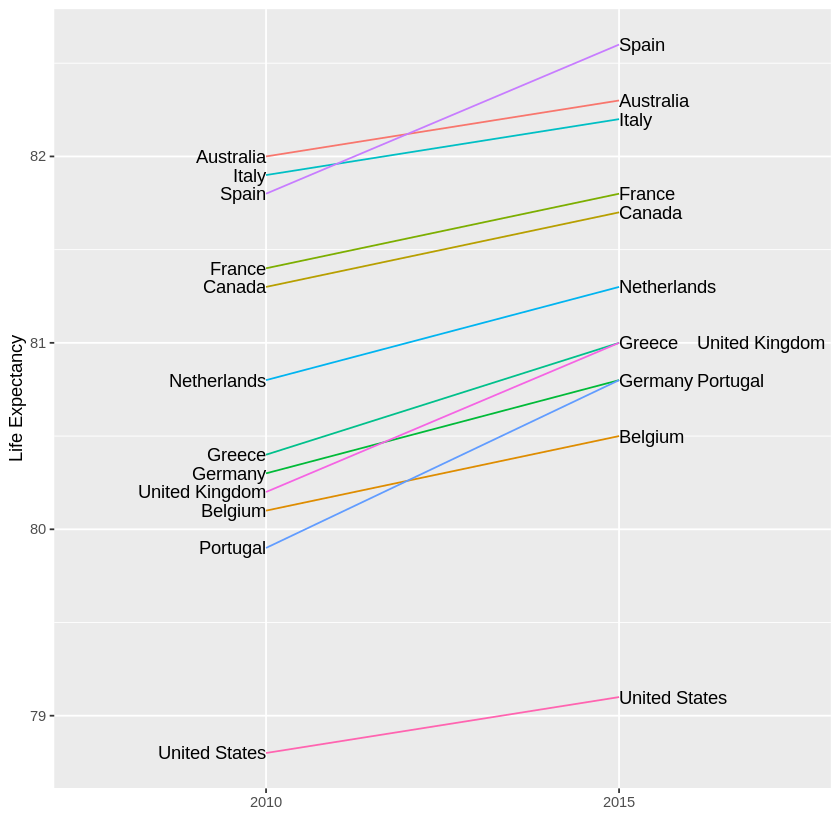

In [15]:
#Code1: Slope chart

west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

dat <- gapminder %>%
    filter(year %in% c(2010, 2015) & region %in% west & !is.na(life_expectancy) & population > 10^7)

dat %>%
    mutate(location = ifelse(year == 2010, 1, 2),
           location = ifelse(year == 2015 & country %in% c("United Kingdom", "Portugal"),
                             location + 0.22, location),
           hjust = ifelse(year == 2010, 1, 0)) %>%
    mutate(year = as.factor(year)) %>%
    ggplot(aes(year, life_expectancy, group = country)) +
    geom_line(aes(color = country), show.legend = FALSE) +
    geom_text(aes(x = location, label = country, hjust = hjust), show.legend = FALSE) +
    xlab("") +
    ylab("Life Expectancy") 


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



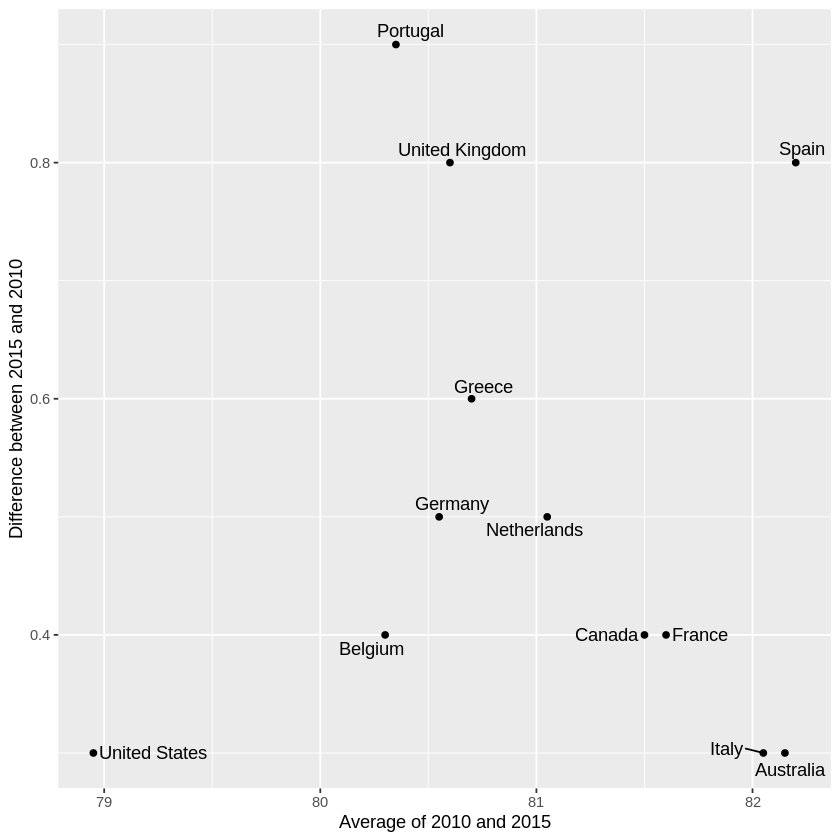

In [17]:
#2.Code: Bland-Altman plot
install.packages("ggrepel")
library(ggrepel)
dat %>%
    mutate(year = paste0("life_expectancy_", year)) %>%
    select(country, year, life_expectancy) %>% spread(year, life_expectancy) %>%
    mutate(average = (life_expectancy_2015 + life_expectancy_2010)/2,
                difference = life_expectancy_2015 - life_expectancy_2010) %>%
    ggplot(aes(average, difference, label = country)) +
    geom_point() +
    geom_text_repel() +
    geom_abline(lty = 2) +
    xlab("Average of 2010 and 2015") +
    ylab("Difference between 2015 and 2010")

##Encoding a Third Variable

- Encode a categorical third variable on a scatterplot using color hue or shape. Use the shape argument to control shape.
- Encode a continuous third variable on a using color intensity or size.

##Case Study: Vaccines
- Vaccines save millions of lives, but misinformation has led some to question the safety of vaccines. The data support vaccines as safe and effective. We visualize data about measles incidence in order to demonstrate the impact of vaccination programs on disease rate.
- The RColorBrewer package offers several color palettes. Sequential color palettes are best suited for data that span from high to low. Diverging color palettes are best suited for data that are centered and diverge towards high or low values.
- The geom_tile() geometry creates a grid of colored tiles.
- Position and length are stronger cues than color for numeric values, but color can be appropriate sometimes.

'data.frame':	16065 obs. of  6 variables:
 $ disease        : Factor w/ 7 levels "Hepatitis A",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state          : Factor w/ 51 levels "Alabama","Alaska",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ year           : num  1966 1967 1968 1969 1970 ...
 $ weeks_reporting: num  50 49 52 49 51 51 45 45 45 46 ...
 $ count          : num  321 291 314 380 413 378 342 467 244 286 ...
 $ population     : num  3345787 3364130 3386068 3412450 3444165 ...


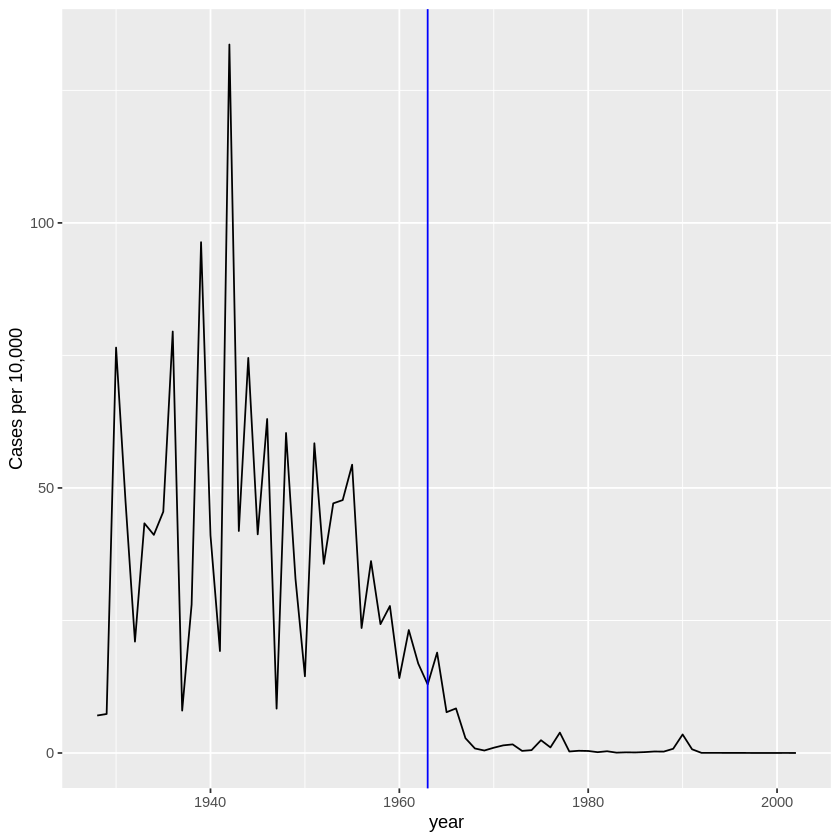

In [18]:
#1. Code: Tile plot of measles rate by year and state
# import data and inspect
library(tidyverse)
library(dslabs)
data(us_contagious_diseases)
str(us_contagious_diseases)

# assign dat to the per 10,000 rate of measles, removing Alaska and Hawaii and adjusting for weeks reporting
the_disease <- "Measles"
dat <- us_contagious_diseases %>%
    filter(!state %in% c("Hawaii", "Alaska") & disease == the_disease) %>%
    mutate(rate = count / population * 10000 * 52/weeks_reporting) %>%
    mutate(state = reorder(state, rate))

# plot disease rates per year in California
dat %>% filter(state == "California" & !is.na(rate)) %>%
    ggplot(aes(year, rate)) +
    geom_line() +
    ylab("Cases per 10,000") +
    geom_vline(xintercept=1963, col = "blue")


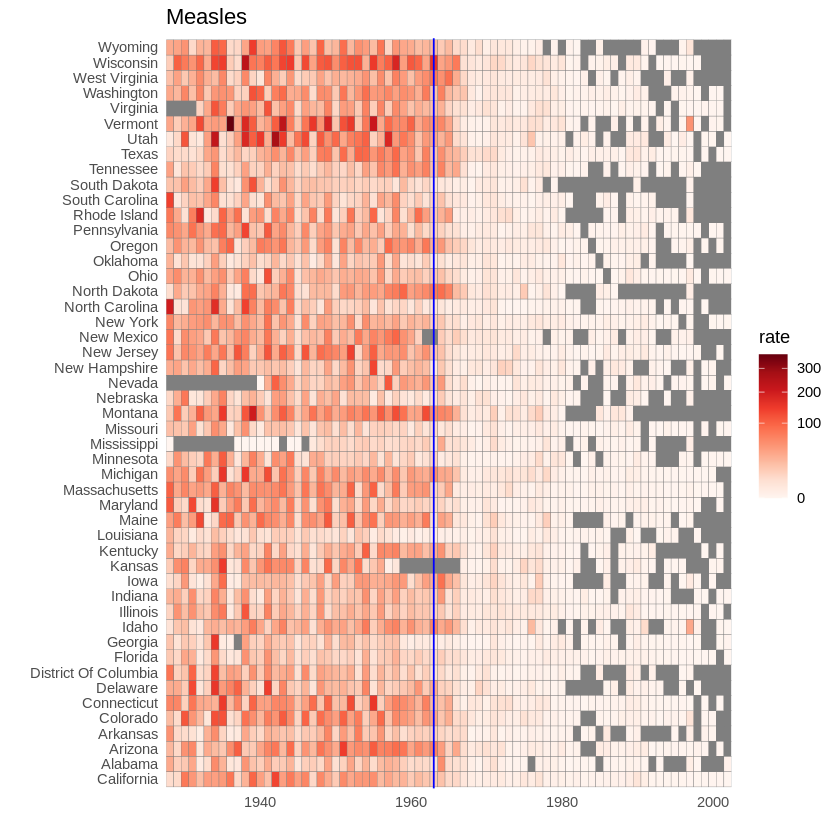

In [19]:

# tile plot of disease rate by state and year
dat %>% ggplot(aes(year, state, fill=rate)) +
    geom_tile(color = "grey50") +
    scale_x_continuous(expand = c(0,0)) +
    scale_fill_gradientn(colors = RColorBrewer::brewer.pal(9, "Reds"), trans = "sqrt") +
    geom_vline(xintercept = 1963, col = "blue") +
    theme_minimal() + theme(panel.grid = element_blank()) +
    ggtitle(the_disease) +
    ylab("") +
    xlab("")


`summarise()` ungrouping output (override with `.groups` argument)



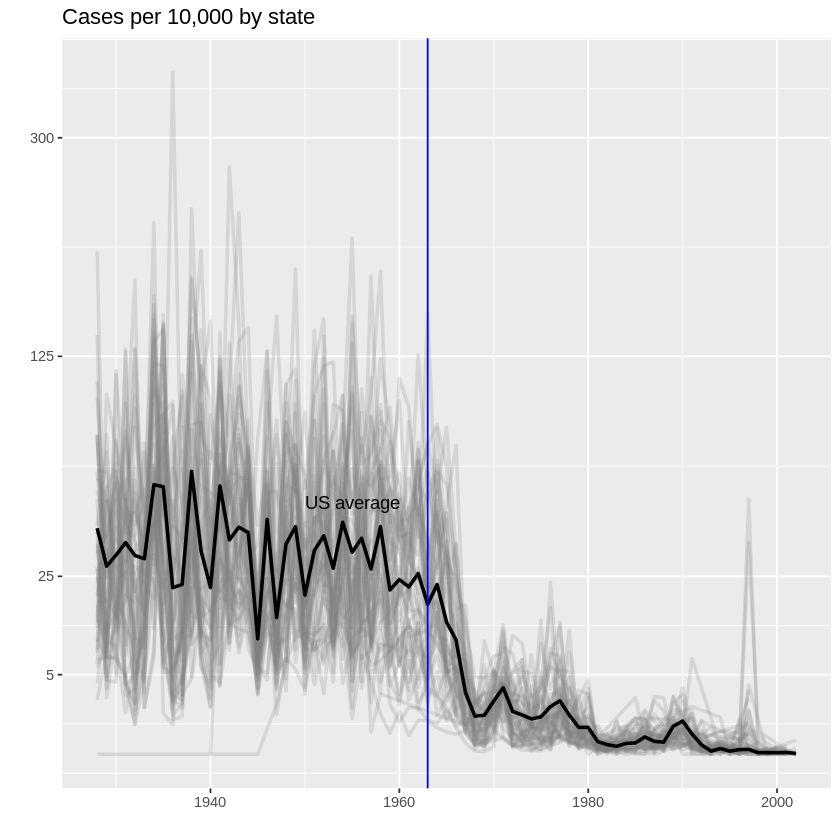

In [20]:
#2.Code: Line plot of measles rate by year and state
# compute US average measles rate by year
avg <- us_contagious_diseases %>%
    filter(disease == the_disease) %>% group_by(year) %>%
    summarize(us_rate = sum(count, na.rm = TRUE)/sum(population, na.rm = TRUE)*10000)

# make line plot of measles rate by year by state
dat %>%
    filter(!is.na(rate)) %>%
    ggplot() +
    geom_line(aes(year, rate, group = state), color = "grey50", 
        show.legend = FALSE, alpha = 0.2, size = 1) +
    geom_line(mapping = aes(year, us_rate), data = avg, size = 1, col = "black") +
    scale_y_continuous(trans = "sqrt", breaks = c(5, 25, 125, 300)) +
    ggtitle("Cases per 10,000 by state") +
    xlab("") +
    ylab("") +
    geom_text(data = data.frame(x = 1955, y = 50),
        mapping = aes(x, y, label = "US average"), color = "black") +
    geom_vline(xintercept = 1963, col = "blue")

##Avoid Pseudo and Gratuitous 3D Plots

In general, pseudo-3D plots and gratuitous 3D plots only add confusion. Use regular 2D plots instead.


##Avoid Too Many Significant Digits
- In tables, avoid using too many significant digits. Too many digits can distract from the meaning of your data.
- Reduce the number of significant digits globally by setting an option. For example, options(digits = 3) will cause all future computations that session to have 3 significant digits.
- Reduce the number of digits locally using round() or signif().

# Exercise
Exercise 1: Tile plot - measles and smallpox

The sample code given creates a tile plot showing the rate of measles cases per population. We are going to modify the tile plot to look at smallpox cases instead.
- Modify the tile plot to show the rate of smallpox cases instead of measles cases.
- Exclude years in which cases were reported in fewer than 10 weeks from the plot.

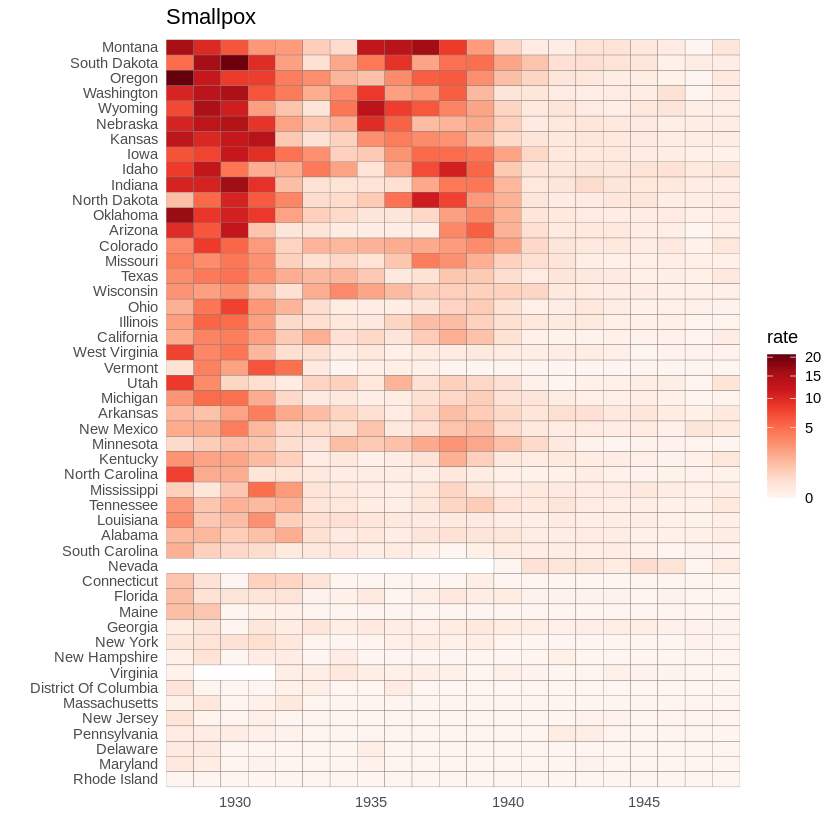

In [21]:
library(dplyr)
library(ggplot2)
library(RColorBrewer)
library(dslabs)
data(us_contagious_diseases)

the_disease = "Smallpox"
dat <- us_contagious_diseases %>% 
   filter(!state%in%c("Hawaii","Alaska") & disease == the_disease &weeks_reporting>=10) %>% 
   mutate(rate = count / population * 10000) %>% 
   mutate(state = reorder(state, rate))

dat %>% ggplot(aes(year, state, fill = rate)) + 
  geom_tile(color = "grey50") + 
  scale_x_continuous(expand=c(0,0)) + 
  scale_fill_gradientn(colors = brewer.pal(9, "Reds"), trans = "sqrt") + 
  theme_minimal() + 
  theme(panel.grid = element_blank()) + 
  ggtitle(the_disease) + 
  ylab("") + 
  xlab("")

Exercise 2. Time series plot - measles and smallpox

The sample code given creates a time series plot showing the rate of measles cases per population by state. We are going to again modify this plot to look at smallpox cases instead.
- Modify the sample code for the time series plot to plot data for smallpox instead of for measles.
- Once again, restrict the plot to years in which cases were reported in at least 10 weeks.

`summarise()` ungrouping output (override with `.groups` argument)



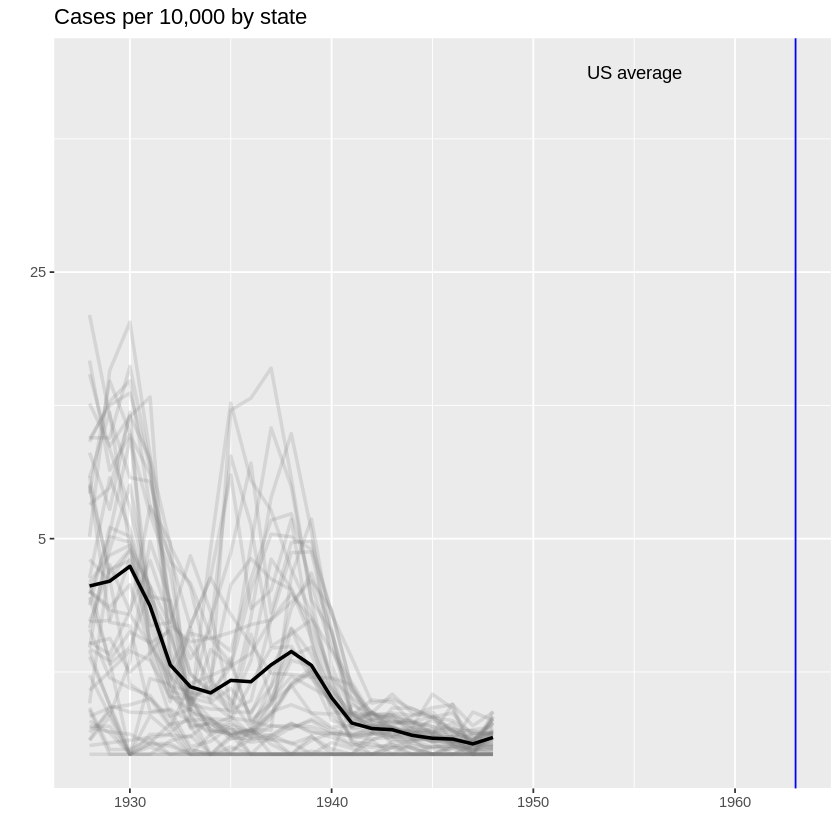

In [22]:
library(dplyr)
library(ggplot2)
library(dslabs)
library(RColorBrewer)
data(us_contagious_diseases)

the_disease = "Smallpox"
dat <- us_contagious_diseases %>%
   filter(!state%in%c("Hawaii","Alaska") & disease == the_disease& weeks_reporting >= 10) %>%
   mutate(rate = count / population * 10000) %>%
   mutate(state = reorder(state, rate))

avg <- us_contagious_diseases %>%
  filter(disease==the_disease& weeks_reporting >= 10) %>% group_by(year) %>%
  summarize(us_rate = sum(count, na.rm=TRUE)/sum(population, na.rm=TRUE)*10000)

dat %>% ggplot() +
  geom_line(aes(year, rate, group = state),  color = "grey50", 
            show.legend = FALSE, alpha = 0.2, size = 1) +
  geom_line(mapping = aes(year, us_rate),  data = avg, size = 1, color = "black") +
  scale_y_continuous(trans = "sqrt", breaks = c(5,25,125,300)) + 
  ggtitle("Cases per 10,000 by state") + 
  xlab("") + 
  ylab("") +
  geom_text(data = data.frame(x=1955, y=50), mapping = aes(x, y, label="US average"), color="black") + 
  geom_vline(xintercept=1963, col = "blue")

#Exercise 3: Time series plot - all diseases in California

Now we are going to look at the rates of all diseases in one state. Again, you will be modifying the sample code to produce the desired plot.
- For the state of California, make a time series plot showing rates for all diseases.
- Include only years with 10 or more weeks reporting.
- Use a different color for each disease.
- Include your aes function inside of ggplot rather than inside your geom layer.

`summarise()` regrouping output by 'year' (override with `.groups` argument)



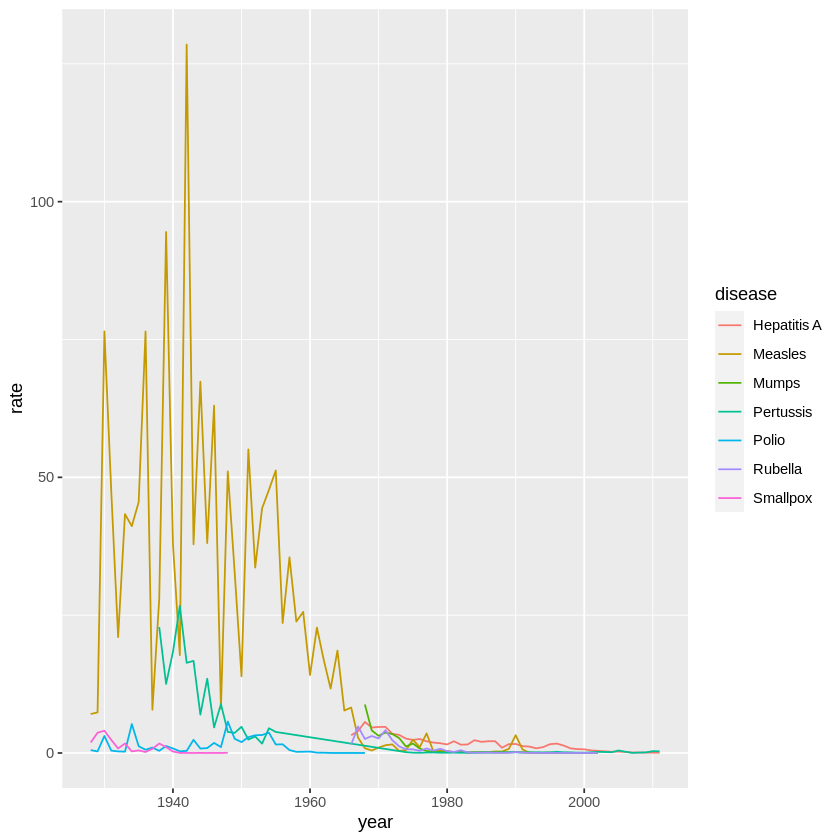

In [23]:
library(dplyr)
library(ggplot2)
library(dslabs)
library(RColorBrewer)
data(us_contagious_diseases)

us_contagious_diseases %>% filter(state=="California"& weeks_reporting >= 10) %>% 
  group_by(year, disease) %>%
  summarize(rate = sum(count)/sum(population)*10000) %>%
  ggplot(aes(year, rate,color=disease)) + 
  geom_line()

Exercise 4: Time series plot - all diseases in the United States

Now we are going to make a time series plot for the rates of all diseases in the United States. For this exercise, we have provided less sample code - you can take a look at the previous exercise to get you started.

- Compute the US rate by using summarize to sum over states. Call the variable rate.
    - The US rate for each disease will be the total number of cases divided by the total population.
    - Remember to convert to cases per 10,000.
- You will need to filter for !is.na(population) to get all the data.
- Plot each disease in a different color.

`summarise()` regrouping output by 'year' (override with `.groups` argument)



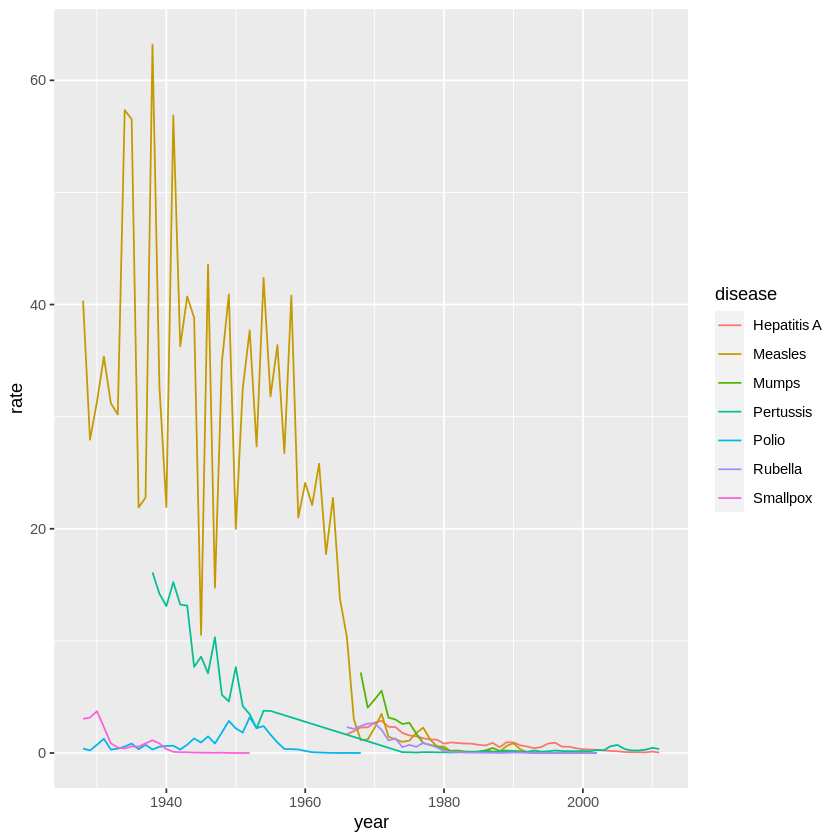

In [24]:
library(dplyr)
library(ggplot2)
library(dslabs)
library(RColorBrewer)
data(us_contagious_diseases)
us_contagious_diseases %>%
    filter(!is.na(population)) %>%
    group_by(year, disease) %>%
    summarize(rate = sum(count)/sum(population)*10000) %>%
    ggplot(aes(year, rate, color = disease)) +
    geom_line()
